In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
df = pd.read_csv('products.csv')
display(df.sample(n=5, random_state=42))

,Product Name_TH,name_en,vendor_id,sku,order_id,state,completed_at,order_state,quantity,price,item_count,phone_number,gender,created_at,date_of_birth,geo_province,geo_district,date
289968,แคนตาลูปสวีต D25 (1.4 -1.7 กก./ลูก),Cantaloupe Sweet D25 (1.4-1.7 Kg./Pcs.),35,307,350066,complete,2023-10-06 04:21:14.756,completed,3,75.0,43,929407710,1,2023-01-16 16:19:23.134,1984-01-25,กรุงเทพมหานคร,เขตบางกะปิ,2023-10-06
442373,สุดคุ้ม!! 2 แพ็ค 329 องุ่นไชน์มัสแคท สายพันธุ์...,NaN,42,553,62538,complete,2022-10-13 07:17:44.895,completed,1,349.0,1,888613879,1,2022-10-13 07:12:37.029,1943-07-05,NaN,NaN,2022-10-13
160658,เซเลอรี่ (500ก./แพ็ค),Celery (500g./pack),347,8713,597369,complete,2024-01-17 16:34:16.784,completed,1,35.0,22,625632236,1,2024-01-03 09:15:33.052,1994-12-18,กรุงเทพมหานคร,เขตวัฒนา,2024-01-17
97220,เชอร์รี่ชิลี Size J ขนาด 26-28 มม. (0.9-1 กก./...,Chilean Cherry Size J 26-28 mm. (0.9-1 kg./Box),11,10011,754431,complete,2024-02-26 08:52:28.799,completed,2,398.0,5,886362999,1,2022-11-20 11:29:27.698,1980-03-21,นนทบุรี,อำเภอปากเกร็ด,2024-02-26
32450,เกรดบี ซื้อ 1 แถม 1 องุ่นดำไร้เมล็ดแม่มด AUS (...,Buy 1 get 1 free AUS Witch Seedless Black Grap...,367,11619,809701,complete,2024-05-15 14:23:35.327,on_delivery,1,350.0,14,818027889,0,2023-11-13 00:39:51.542,1972-09-06,กรุงเทพมหานคร,เขตราชเทวี,2024-05-15


In [32]:
# # เลือก 3 แถวแรกโดยใช้ .iloc[]
# df = df.iloc[:200000]  # เลือก 3 แถวแรก (0, 1, 2)
# print(df)

In [35]:
df.shape

(450139, 13)

In [4]:
# เลือกฟีเจอร์ที่ใช้ในการจัดกลุ่ม
features = df[['quantity', 'price', 'item_count','phone_number']]

In [5]:
# ปรับมาตรฐานข้อมูล
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
# ใช้ K-Means ในการจัดกลุ่ม
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [7]:
# เพิ่มข้อมูลการจัดกลุ่มกลับเข้าไปใน DataFrame
df['Cluster'] = clusters

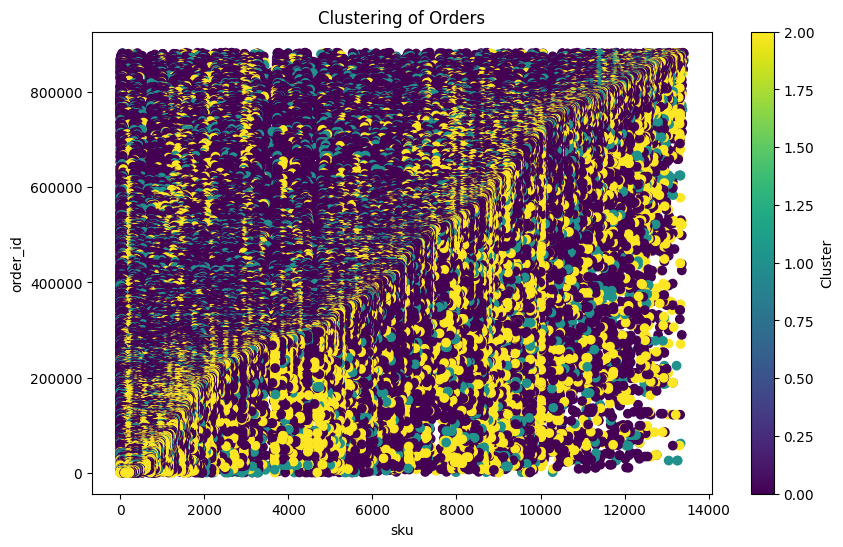

In [8]:
# ปรับขนาดของกราฟ
plt.figure(figsize=(10, 6))

# แสดงกราฟการจัดกลุ่ม
plt.scatter(df['sku'], df['order_id'], c=df['Cluster'], cmap='viridis', alpha=1)  # เพิ่ม alpha เพื่อทำให้จุดทับกันเล็กน้อย
plt.xlabel('sku')
plt.ylabel('order_id')
plt.title('Clustering of Orders')
plt.colorbar(label='Cluster')  # เพิ่มสีของค่า Cluster ในกราฟ
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import numpy as np

# โหลดข้อมูล
file_path = df

# เตรียมข้อมูลสำหรับการแนะนำสินค้า
# ใช้ข้อมูล order_id และ sku
order_sku_matrix = df.pivot_table(index='order_id', columns='sku', values='quantity', fill_value=0)

# แยกข้อมูล train และ test
train_data, test_data = train_test_split(order_sku_matrix, test_size=0.2, random_state=42)

# สร้างโมเดล KNNBasic
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(train_data)

# ทำนายสินค้าที่คล้ายกันสำหรับ order_id หนึ่ง (ตัวอย่าง order_id = 861188)
sample_order_id = 716933

# ค้นหา 10 เพื่อนบ้านที่ใกล้ที่สุด
distances, indices = model.kneighbors(train_data.loc[sample_order_id].values.reshape(1, -1), n_neighbors=10)

# แสดงสินค้าที่แนะนำ
recommended_orders = [train_data.index[i] for i in indices.flatten()]

print(f"Recommended Orders for Order {sample_order_id}: {recommended_orders}")


Recommended Orders for Order 716933: [716933, 175083, 682764, 467962, 486825, 491518, 412800, 716434, 711804, 716366]


In [10]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\Nice\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd

# โหลดข้อมูลจากไฟล์ CSV
data = df

# สร้างรายการธุรกรรมโดยการจัดกลุ่มสินค้า
transactions = data.groupby('phone_number')['sku'].apply(list)

# แปลงรายการธุรกรรมเป็นรูปแบบ One-Hot Encoding
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# แสดงข้อมูลที่เตรียมไว้
print(df.head())

   2      3      4      5      6      7      8      9      11     12     ...  \
0  False  False  False  False  False  False  False  False  False  False  ...   
1  False  False  False  False  False  False  False  False  False  False  ...   
2  False  False  False  False  False  False  False  False  False  False  ...   
3  False  False  False  False  False  False  False  False  False  False  ...   
4  False  False  False  False  False  False  False  False  False  False  ...   

   13375  13378  13380  13387  13388  13393  13394  13398  13406  13408  
0  False  False  False  False  False  False  False  False  False  False  
1  False  False  False  False  False  False  False  False  False  False  
2  False  False  False  False  False  False  False  False  False  False  
3  False  False  False  False  False  False  False  False  False  False  
4  False  False  False  False  False  False  False  False  False  False  

[5 rows x 10693 columns]


In [12]:
from mlxtend.frequent_patterns import apriori, association_rules

# ใช้อัลกอริทึม Apriori เพื่อค้นหากลุ่มสินค้าที่ถูกซื้อพร้อมกันบ่อยครั้ง
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# ตรวจสอบ itemsets ที่พบ
print("\nFrequent Itemsets:")
print(frequent_itemsets.head())

# สร้างกฎการเชื่อมโยง
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# แสดงกฎการเชื่อมโยงที่มีความเชื่อมั่นสูงสุด
rules.sort_values(by='confidence', ascending=False, inplace=True)
print(rules.head(10))


Frequent Itemsets:
    support itemsets
0  0.012394     (13)
1  0.031636     (14)
2  0.010273     (16)
3  0.011333     (18)
4  0.014970     (22)
  antecedents consequents  antecedent support  consequent support   support  \
2       (736)       (330)            0.041303            0.074061  0.017636   
1        (14)       (330)            0.031636            0.074061  0.012758   
4      (2888)       (330)            0.033152            0.074061  0.012455   
3       (330)       (736)            0.074061            0.041303  0.017636   
0       (330)        (14)            0.074061            0.031636  0.012758   
5       (330)      (2888)            0.074061            0.033152  0.012455   

   confidence      lift  leverage  conviction  zhangs_metric  
2    0.426999  5.765538  0.014577    1.615948       0.862166  
1    0.403257  5.444956  0.010415    1.551654       0.843014  
4    0.375686  5.072677  0.009999    1.483130       0.830394  
3    0.238134  5.765538  0.014577    1.258354   

ตีความผลลัพธ์ที่ได้จากการวิเคราะห์เพื่อระบุสินค้าที่มักจะขายคู่กัน:

antecedents คือสินค้าที่มีการซื้อมาก่อน
consequents คือสินค้าที่มักจะถูกซื้อร่วมกันกับสินค้านั้น
support คือความถี่ที่กลุ่มสินค้านั้นถูกซื้อร่วมกัน
confidence คือความน่าจะเป็นที่สินค้าจะถูกซื้อร่วมกัน
lift คือการวัดความแข็งแรงของความสัมพันธ์ระหว่างสินค้านั้น
โดยทั่วไป ค่าความเชื่อมั่น (confidence) และค่ายก (lift) ที่สูงจะแสดงถึงความสัมพันธ์ที่แข็งแรง

In [13]:
for index, row in rules.iterrows():
    antecedents = ", ".join(map(str, list(row['antecedents'])))
    consequents = ", ".join(map(str, list(row['consequents'])))
    print(f"สินค้าที่มักจะขายคู่กัน: {antecedents} -> {consequents}, ความเชื่อมั่น: {row['confidence']:.2f}, Lift: {row['lift']:.2f}")


สินค้าที่มักจะขายคู่กัน: 736 -> 330, ความเชื่อมั่น: 0.43, Lift: 5.77
สินค้าที่มักจะขายคู่กัน: 14 -> 330, ความเชื่อมั่น: 0.40, Lift: 5.44
สินค้าที่มักจะขายคู่กัน: 2888 -> 330, ความเชื่อมั่น: 0.38, Lift: 5.07
สินค้าที่มักจะขายคู่กัน: 330 -> 736, ความเชื่อมั่น: 0.24, Lift: 5.77
สินค้าที่มักจะขายคู่กัน: 330 -> 14, ความเชื่อมั่น: 0.17, Lift: 5.44
สินค้าที่มักจะขายคู่กัน: 330 -> 2888, ความเชื่อมั่น: 0.17, Lift: 5.07
